# Q1

In [ ]:
# A

In [ ]:
import pandas as pd
df1 = pd.read_csv('Data1.csv')
df2 = pd.read_csv('Data2.csv')

In [ ]:
# B

In [ ]:
print(df1.dtypes)
print('-'*30)
print(df2.dtypes)

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object
------------------------------
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [ ]:
# C

In [ ]:
df = pd.merge(df1, df2,on='ID')

In [ ]:
# D

In [ ]:
# lst_key = ['LoanOnCard','CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']
lst_key = ['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']
lst_val = ['object']*len(lst_key)

In [ ]:
data_dict = {lst_key[i]: lst_val[i] for i in range(len(lst_key))}

In [ ]:
data_dict

{'CreditCard': 'object',
 'InternetBanking': 'object',
 'FixedDepositAccount': 'object',
 'Security': 'object',
 'Level': 'object',
 'HiddenScore': 'object'}

In [ ]:
df = df.astype(data_dict)

In [ ]:
df.shape

(5000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


# Q2

In [ ]:
# A

<AxesSubplot:>

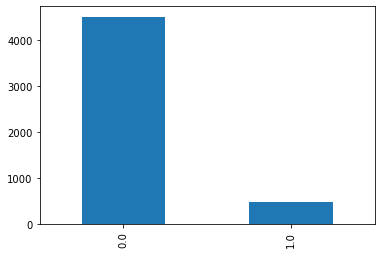

In [ ]:
df['LoanOnCard'].value_counts().plot(kind='bar')

 Data is highly imbalanced towards 'No'

In [ ]:
# B

In [ ]:
df.isna().sum()/len(df)*100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

0.4% Null values in LoanOnCard

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()/len(df)*100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64

In [ ]:
# C

In [ ]:
col_list = df.select_dtypes(include='object').columns

In [ ]:
for i in col_list:
    print('Unique values in {} are \n'.format(i),df[i].value_counts())
    print(i)
    print('*'*20)

Unique values in HiddenScore are 
 1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64
HiddenScore
********************
Unique values in Level are 
 1    2089
3    1496
2    1395
Name: Level, dtype: int64
Level
********************
Unique values in Security are 
 0    4460
1     520
Name: Security, dtype: int64
Security
********************
Unique values in FixedDepositAccount are 
 0    4678
1     302
Name: FixedDepositAccount, dtype: int64
FixedDepositAccount
********************
Unique values in InternetBanking are 
 1    2974
0    2006
Name: InternetBanking, dtype: int64
InternetBanking
********************
Unique values in CreditCard are 
 0    3514
1    1466
Name: CreditCard, dtype: int64
CreditCard
********************


No unknown values observed

# Q3

In [ ]:
# A

In [ ]:
X = df.drop(['LoanOnCard','ID','ZipCode'],axis=1)
y = df['LoanOnCard']

In [ ]:
# B

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 90,test_size=0.25)

In [ ]:
# C

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
3981,64,39,22,3,0.50,1,0,1,1,1,1
1270,43,18,60,2,2.20,3,0,0,0,0,1
1336,36,12,42,1,1.33,1,0,0,0,1,0
2123,28,2,9,1,0.10,2,0,0,0,1,0
1808,55,31,50,4,1.50,1,0,0,0,1,0


In [ ]:
lr = LogisticRegression()
# lr.fit(x_train,y_train.astype('int'))
lr.fit(x_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

In [ ]:
test_pred.shape

(1245,)

In [ ]:
y_test.shape

(1245,)

In [ ]:
# D

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      3375
         1.0       0.81      0.60      0.69       360

    accuracy                           0.95      3735
   macro avg       0.88      0.79      0.83      3735
weighted avg       0.94      0.95      0.94      3735



In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1125
         1.0       0.93      0.59      0.72       120

    accuracy                           0.96      1245
   macro avg       0.95      0.79      0.85      1245
weighted avg       0.96      0.96      0.95      1245



# Additional Part - This part is not included in project statement. However, this is a balancing of data and checking accuracy after fitting the model again over balanced data

It is observed that accuracy is more but precision and recall values are on lower side for event 1.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_under, y_under = undersample.fit_resample(X, y)

In [ ]:
X_under.shape

(1440, 11)

In [ ]:
y_under.shape

(1440,)

In [ ]:
y_under.value_counts()

0.0    960
1.0    480
Name: LoanOnCard, dtype: int64

In [ ]:
X_new,y_new = oversample.fit_resample(X_under, y_under)

In [ ]:
y_new.value_counts()

0.0    960
1.0    960
Name: LoanOnCard, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.25,random_state=87)

In [ ]:
lr.fit(x_train,y_train)
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       725
         1.0       0.90      0.91      0.90       715

    accuracy                           0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440



In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       235
         1.0       0.89      0.88      0.88       245

    accuracy                           0.88       480
   macro avg       0.88      0.88      0.88       480
weighted avg       0.88      0.88      0.88       480



Accuracy, precision and recall are improved and close to each other after balancing the data

# Happy Learning :)